### Desafío - Análisis lineal discriminante

#### Ejercicio 1: Preparación de ambiente de trabajo

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import sys
sys.path.append('../../utils/')
from calidad_datos import calidad_datos as cal
import lec4_graphs as gfx

# Quitamos la columna index
df = pd.read_csv('../../data/Taller2/default_credit.csv').drop(columns='index')

# Se cambia el nombre de columna default
df=df.rename(columns={'default':'moroso'})
target_label = df['moroso'].unique()

df

,moroso,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [37]:
df['student'] = LabelEncoder().fit_transform(df['student'])
#df['moroso'] = LabelEncoder().fit_transform(df['moroso'])

df

,moroso,student,balance,income
0,No,0,729.526495,44361.625074
1,No,1,817.180407,12106.134700
2,No,0,1073.549164,31767.138947
3,No,0,529.250605,35704.493935
4,No,0,785.655883,38463.495879
...,...,...,...,...
9995,No,0,711.555020,52992.378914
9996,No,0,757.962918,19660.721768
9997,No,0,845.411989,58636.156984
9998,No,0,1569.009053,36669.112365


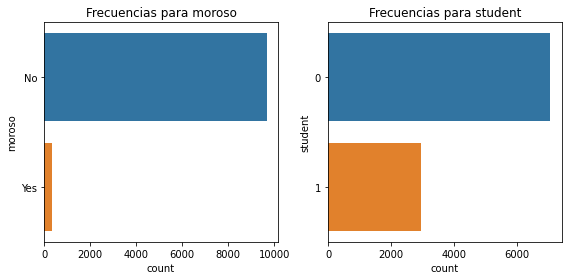

In [46]:
plt.figure(figsize=(8, 4))
for n, i in enumerate(['moroso', 'student']):
    plt.subplot(1, 2, n + 1)
    sns.countplot(y= df[i], order = df[i].value_counts().index)
    plt.title('Frecuencias para {}'.format(i))
    plt.tight_layout()

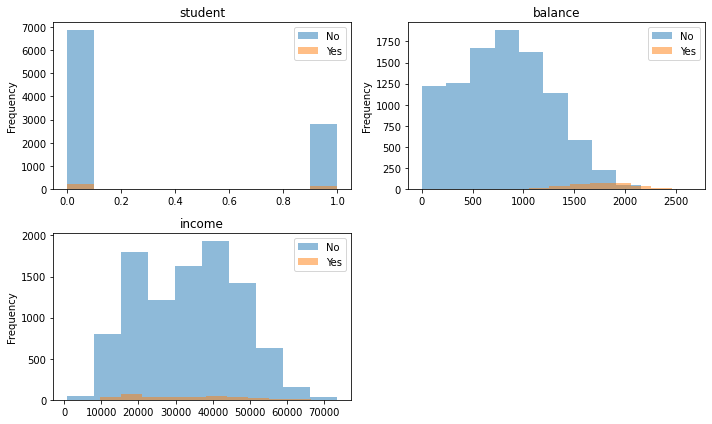

In [50]:

plt.figure(figsize=(10, 6))
for n, i in enumerate(df.drop(columns = {'moroso'}).columns):
    plt.subplot(2, 2, n + 1)
    df.groupby('moroso')[i].plot(kind='hist', alpha=.5)
    plt.legend(df['moroso'].unique())
    plt.title(i)
    plt.tight_layout()

#### Ejercicio 2: Modelo base

In [51]:
X_train_mat, X_test_mat, y_train_vec, y_test_vec = train_test_split(df.loc[:, 'student':'income'], df['moroso'], test_size=.33, random_state=11238)

In [52]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_mat, y_train_vec)

LinearDiscriminantAnalysis()

In [53]:
lda_model = LinearDiscriminantAnalysis(n_components=None, priors=None,
            shrinkage=None,solver='svd', store_covariance=False, tol=0.0001)

lda_model.fit(X_train_mat, y_train_vec)

LinearDiscriminantAnalysis()

In [54]:
print("Probabilidades a priori\n", lda_model.priors_, "\n")
print("Medias de atributos en cada clase\n",
lda_model.means_.round(2), "\n")
print("Varianza explicada por cada discriminante\n",
lda_model.explained_variance_ratio_.round(2), "\n")

Probabilidades a priori
 [0.96731343 0.03268657] 

Medias de atributos en cada clase
 [[2.900000e-01 8.036500e+02 3.340200e+04]
 [3.600000e-01 1.734750e+03 3.217489e+04]] 

Varianza explicada por cada discriminante
 [1.] 



In [55]:
lda_model.coef_

array([[-6.46927932e-01,  4.65931873e-03, -7.50785395e-07]])

In [56]:
lda_class_pred = lda_model.predict(X_test_mat)
lda_class_pred[:20]

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'], dtype='<U3')

#### Ejercicio 3: Refactorización 1 - información a priori

#### Ejercicio 4: Refactorización 2 - oversampling


#### Ejercicio 5: Refactorización 3 - QDA